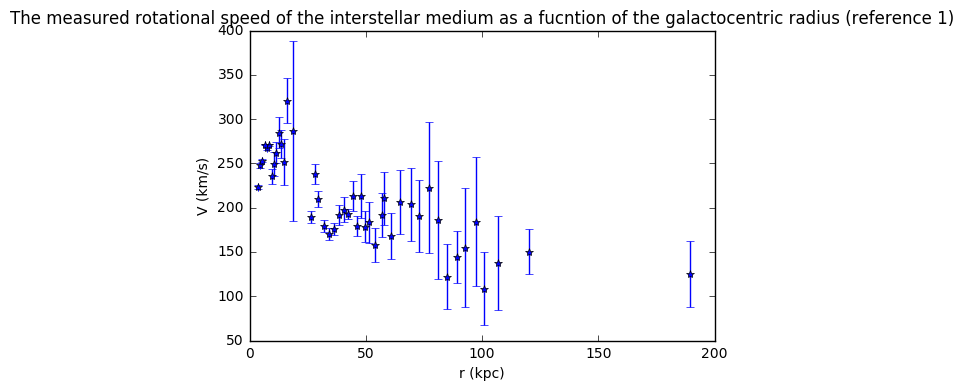

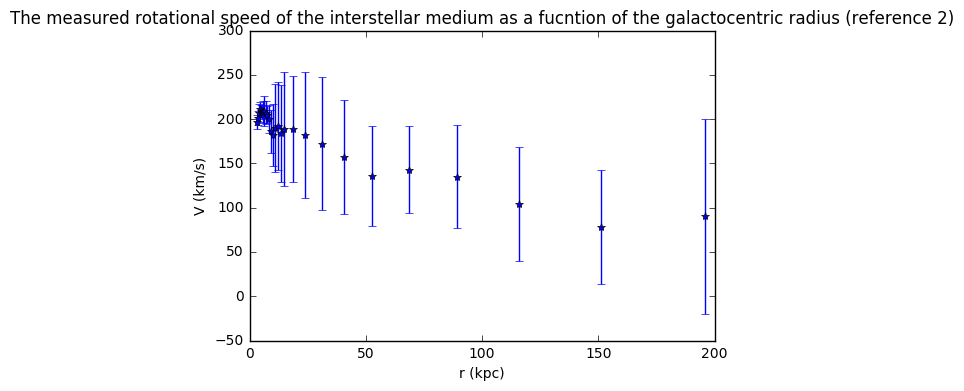

In [8]:
import numpy as np
import nestle
import math

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import corner

from scipy.integrate import quad

from nsdmd import model 
from nsdmd import io

import pandas as pd


# Define the data for two references:
# Reference 1: Bhattacharjee et. al.
# Reference 2: Sofue 
### The data will be used in this project is the measured rotational speed of the interstellar medium in our local galaxy, as shown in the following figure. 


#load data
data_x_ref1,data_xerr_ref2,data_y_ref1,data_yerr_ref1 =io.load_data('dataref1.txt')
data_x_ref2,data_xerr_ref2,data_y_ref2,data_yerr_ref2 =io.load_data2('dataref2.txt')

data_xerr = 0
plt.figure()
plt.errorbar(data_x_ref1,data_y_ref1,xerr=data_xerr,yerr=data_yerr_ref1,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 1)")
plt.show()



data_xerr = 0
plt.figure()
plt.errorbar(data_x_ref2,data_y_ref2,xerr=data_xerr,yerr=data_yerr_ref2,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 2)")
plt.show()

In [9]:
# Define the model we use to describe the data.

def model_ISO(theta, x):
    
    # Calculate the mass between 0 and data_x by integrating the ISO distribution.
    #
    # Note: the mass defined here does not include the normalization constant rho0 (kg/kpc^3).
    # The units of a are kpc.
    # The units of the "mass" calculated here are thus kpc^3.
    a = theta[0]
    mass = 4.*np.pi* ( (a**2*x)   -   a**4 * np.log((a**2 + x ) ) )
        
    # Calculate the rotation velocity: vrot = theta[1]*sqrt(mass/x)
    # The units of sqrt(mass/x) are kpc.
    # The rotation velocity is equal to sqrt(G*rho0)*sqrt((M/rho0)/x) where M is the mass enclosed, 
    # rho0 is the normalization constant of the mass distribution, and x is the distance at which we
    # calculate vrot.
    # When we determine theta[1], we determine sqrt(G*rho0).
    # The units of vrot are km/s.
    # The units of sqrt(mass/x) are kpc.
    # The units of theta[1] are thus (km/s)/kpc = (10^3 m)/s/(3.086E19 m) = 3.24E-17 1/s.
    # Since theta[1] = sqrt(G*rho0) we can now determine rho0: rho0 = theta[1]^2/G.
    # The units on the right-hand side are: (3.24E-17 1/s)^2/(m^3/(kg s^2)) = (3.24E-17)^2 kg/(m^3)
    # To convert from kg/m^3 to kg/kpc^3, we multiply by (3.086E19)^3
    # The normalization constant rho0 is thus (theta1[1]^2)/6.67E-11 * ((3.24E-17)^2 * (3.086E19)^3 kg/(kpc)^3 = 
    # (theta1[1]^2)*4.625E35 kg/(kpc)^3 = 2.312E5 Msun/(kpc)^3.
    vrot = theta[1]*np.sqrt(mass/x) 
    
    return vrot
                      
                      


In [10]:
                      
# Define a likelihood function
def loglike_ISO_ref1(theta):
    
    # Calculate the mass between 0 and data_x by integrating the NFW distribution.
    a = theta[0]
                      
                      
    mass = 4.*np.pi* ( (a**2*data_x_ref1)   -   a**4 * np.log((a**2 + data_x_ref1 ) ) )

        
    # Calculate the rotation velocity.
    vrot = theta[1]*np.sqrt(mass/data_x_ref1) 
        
    # The y variable is the rotational velocity.
    y = vrot
    
    # Calculate chisq
    chisq= np.sum(((data_y_ref1 - y) / data_yerr_ref1)**2)
    return -chisq / 2.





In [ ]:
def prior_transform_ISO(theta):
    
    # theta[0] in the range of [0,10] and theta[1] in the range of [0,300]
    return  np.array([20, 300]) * theta
    #return  np.array([10*theta[0],500*theta[1]])

In [ ]:
# Run nested sampling.

# Start with reference 1

result_ref1 = nestle.sample(loglike_ISO_ref1, prior_transform_ISO, 2)

print ('Number of iterations for Data in Reference 1')
print (result_ref1.niter)

print ('log evidence for Data in Reference 1')
print (result_ref1.logz)

print ('numerical (sampling) error on logz for Data in Reference 1')
print (result_ref1.logzerr)   
       
print ('array of sample parameters for Data in Reference 1')
print (result_ref1.samples)  

In [ ]:
1+1